In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from varclushi import VarClusHi
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from data_analysis import rename_clc_codes, analysis_latex_table, plot_correlations, data_analysis, calculate_nan_statistics , plot_log_distribution, plot_distribution_and_qq, calculate_correlation_matrix, calculate_correlation_with_p_value, perform_pca, variable_clustering, print_features_by_correlation, print_features_by_spearman_correlation, remove_underscores, custom_latex_format 

In [5]:
df = pd.read_csv('/gb_pv_capacity_model/data/20241127/processed/merged_nuts3_data_percentage.csv')
df

,nuts_cd,country_cd,nuts_name,year,date,capacity_mwp,national_capacity_mwp,regional_capacity_percentage,111_percentage,112_percentage,...,gva_pounds_million_87_percentage,gva_pounds_million_88_percentage,gva_pounds_million_R_90_93_percentage,gva_pounds_million_90_91_percentage,gva_pounds_million_92_93_percentage,gva_pounds_million_S_94_96_percentage,gva_pounds_million_94_percentage,gva_pounds_million_95_percentage,gva_pounds_million_96_percentage,gva_pounds_million_T_97_98_percentage
0,UKM92,UK,Dumfries & Galloway,2010,2010-12-31,0.0,79.786102,0.0,0.000375,0.018984,...,0.253026,0.447442,0.135283,0.069774,0.165906,0.121451,0.057200,0.113830,0.158667,0.093414
1,UKM92,UK,Dumfries & Galloway,2011,2011-12-31,0.0,993.631467,0.0,0.000375,0.018984,...,0.294362,0.436518,0.135857,0.066024,0.174090,0.122996,0.044517,0.096479,0.162613,0.046860
2,UKM92,UK,Dumfries & Galloway,2012,2012-12-31,0.0,1778.962003,0.0,0.000375,0.018984,...,0.304802,0.500669,0.135444,0.064809,0.175195,0.119840,0.029994,0.103520,0.160359,0.090992
3,UKM92,UK,Dumfries & Galloway,2013,2013-12-31,0.0,2891.717265,0.0,0.000375,0.018984,...,0.313126,0.496654,0.129478,0.060489,0.174544,0.117758,0.027720,0.097656,0.166636,0.042589
4,UKM92,UK,Dumfries & Galloway,2014,2014-12-31,0.0,5364.097718,0.0,0.000375,0.018984,...,0.341463,0.518188,0.121035,0.049832,0.156966,0.126681,0.027181,0.039936,0.182589,0.077700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,UKM77,UK,Perth & Kinross and Stirling,2019,2019-12-31,0.0,13024.980325,0.0,0.000488,0.029355,...,0.578692,0.305157,0.251444,0.298758,0.224287,0.358686,0.102810,0.149869,0.482557,0.259067
2348,UKM77,UK,Perth & Kinross and Stirling,2020,2020-12-31,0.0,13421.966133,0.0,0.000488,0.029355,...,0.664452,0.294251,0.306693,0.496155,0.198413,0.282282,0.089790,0.248344,0.366514,0.227347
2349,UKM77,UK,Perth & Kinross and Stirling,2021,2021-12-31,0.0,13967.189838,0.0,0.000488,0.029355,...,0.586406,0.321683,0.239743,0.405743,0.141643,0.229764,0.136955,0.141343,0.286033,0.203597
2350,UKM77,UK,Perth & Kinross and Stirling,2022,2022-12-31,0.0,14995.536818,0.0,0.000488,0.029355,...,0.574218,0.352844,0.242504,0.363366,0.162999,0.224449,0.086049,0.124339,0.289064,0.174034


In [6]:
# Rename columns
df = rename_clc_codes(df)

In [7]:
descriptive_statistics = df.describe()
descriptive_statistics

,year,capacity_mwp,national_capacity_mwp,regional_capacity_percentage,1.1.1. Continuous urban fabric,1.1.2. Discontinuous urban fabric,1.2.1. Industrial or commercial units,1.2.2. Road and rail networks and associated land,1.2.3. Port areas,1.2.4. Airports,...,gva_pounds_million_87_percentage,gva_pounds_million_88_percentage,gva_pounds_million_R_90_93_percentage,gva_pounds_million_90_91_percentage,gva_pounds_million_92_93_percentage,gva_pounds_million_S_94_96_percentage,gva_pounds_million_94_percentage,gva_pounds_million_95_percentage,gva_pounds_million_96_percentage,gva_pounds_million_T_97_98_percentage
count,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,...,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,2016.500000,52.719780,9254.066711,0.566980,0.000731,0.031857,0.006067,0.000391,0.000262,0.000850,...,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238
std,4.031986,98.186081,5571.744910,0.855264,0.000822,0.019000,0.004360,0.000598,0.000527,0.001443,...,0.425470,0.449977,0.830954,1.427810,0.657215,0.642707,1.654118,1.025890,0.441033,0.516450
min,2010.000000,0.000000,79.786102,0.000000,0.000000,0.001737,0.000000,0.000000,0.000000,0.000000,...,0.012525,0.025939,0.003764,0.000000,0.000000,0.005880,0.010756,0.000000,0.004427,0.000000
25%,2013.000000,2.971716,2891.717265,0.085518,0.000213,0.018382,0.002802,0.000000,0.000000,0.000000,...,0.308778,0.292526,0.206128,0.099664,0.240308,0.238989,0.095135,0.097656,0.284856,0.208841
50%,2016.500000,14.677354,12038.068242,0.253515,0.000498,0.027558,0.004861,0.000166,0.000000,0.000164,...,0.482131,0.486378,0.359902,0.223376,0.384712,0.433567,0.214500,0.276352,0.474884,0.414508
75%,2020.000000,50.488980,13421.966133,0.676596,0.000979,0.039554,0.008331,0.000499,0.000266,0.001109,...,0.771488,0.773312,0.639843,0.560608,0.663735,0.714551,0.494813,0.673261,0.781739,0.854922
max,2023.000000,746.628611,16750.745028,6.691774,0.005174,0.099448,0.019372,0.003668,0.003546,0.007380,...,3.309854,3.233589,9.700147,16.857343,6.859410,6.717836,19.720033,11.853002,2.863062,2.564103


In [8]:
descriptive_statistics_transposed=descriptive_statistics.transpose()
descriptive_statistics_transposed

,count,mean,std,min,25%,50%,75%,max
year,2352.0,2016.500000,4.031986,2010.000000,2013.000000,2016.500000,2020.000000,2023.000000
capacity_mwp,2352.0,52.719780,98.186081,0.000000,2.971716,14.677354,50.488980,746.628611
national_capacity_mwp,2352.0,9254.066711,5571.744910,79.786102,2891.717265,12038.068242,13421.966133,16750.745028
regional_capacity_percentage,2352.0,0.566980,0.855264,0.000000,0.085518,0.253515,0.676596,6.691774
1.1.1. Continuous urban fabric,2352.0,0.000731,0.000822,0.000000,0.000213,0.000498,0.000979,0.005174
...,...,...,...,...,...,...,...,...
gva_pounds_million_S_94_96_percentage,2184.0,0.595238,0.642707,0.005880,0.238989,0.433567,0.714551,6.717836
gva_pounds_million_94_percentage,2184.0,0.595238,1.654118,0.010756,0.095135,0.214500,0.494813,19.720033
gva_pounds_million_95_percentage,2184.0,0.595238,1.025890,0.000000,0.097656,0.276352,0.673261,11.853002
gva_pounds_million_96_percentage,2184.0,0.595238,0.441033,0.004427,0.284856,0.474884,0.781739,2.863062


In [9]:
# remove underscores for latex table
descriptive_statistics_transposed.index = descriptive_statistics_transposed.index.to_series().apply(remove_underscores)


In [10]:
print(descriptive_statistics_transposed.to_latex(float_format=custom_latex_format, longtable=True))

\begin{longtable}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
\endfirsthead
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
year & $2.4\times 10^{3}$ & $2.0\times 10^{3}$ & 4.0 & $2.0\times 10^{3}$ & $2.0\times 10^{3}$ & $2.0\times 10^{3}$ & $2.0\times 10^{3}$ & $2.0\times 10^{3}$ \\
capacity mwp & $2.4\times 10^{3}$ & 52.7 & 98.2 & 0.0 & 3.0 & 14.7 & 50.5 & 746.6 \\
national capacity mwp & $2.4\times 10^{3}$ & $9.3\times 10^{3}$ & $5.6\times 10^{3}$ & 79.8 & $2.9\times 10^{3}$ & $1.2\times 10^{4}$ & $1.3\times 10^{4}$ & $1.7\times 10^{4}$ \\
regional capacity percentage & $2.4\times 10^{3}$ & 0.6 & 0.9 & 0.0 & 0.1 & 0.3 & 0.7 & 6.7 \\
1.1.1. Continuous urban fabric & $2.4\times 10^{3}$ & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
1.1.2. Discontinuous urban fabric & $2.4\times 10^{3}$ & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 

In [11]:
# # save to csv
# descriptive_statistics.to_csv('descriptive_statistics_by_nuts3.csv')

### Correlation Analysis

In [12]:
analysis = data_analysis(df, 'regional_capacity_percentage')
analysis

,Feature,R-squared,Pearson Correlation,Pearson P-value,Spearman Correlation,Spearman P-value,Data Availability (%),Correlation Average
0,year,0.00,0.00,0.8528,-0.04,0.0378,100.000000,-0.020
1,capacity_mwp,0.69,0.83,0.0000,0.78,0.0000,100.000000,0.805
2,national_capacity_mwp,0.00,0.01,0.7983,-0.04,0.0378,100.000000,-0.015
3,1.1.1. Continuous urban fabric,0.00,-0.04,0.0607,0.03,0.1825,100.000000,-0.005
4,1.1.2. Discontinuous urban fabric,0.34,0.58,0.0000,0.62,0.0000,100.000000,0.600
...,...,...,...,...,...,...,...,...
124,gva_pounds_million_S_94_96_percentage,0.02,0.13,0.0000,0.40,0.0000,92.857143,0.265
125,gva_pounds_million_94_percentage,0.00,-0.03,0.1442,0.32,0.0000,92.857143,0.145
126,gva_pounds_million_95_percentage,0.00,0.06,0.0059,0.24,0.0000,92.857143,0.150
127,gva_pounds_million_96_percentage,0.11,0.33,0.0000,0.43,0.0000,92.857143,0.380


In [13]:
analysis_latex_table = analysis_latex_table(analysis)
analysis_latex_table

,Feature,Data Availability (%),R-squared,Pearson Correlation,Spearman Correlation,Correlation Average,Literature
1,capacity_mwp,100,0.69,0.83***,0.78***,0.80,
109,gva_pounds_million_75_percentage,93,0.41,0.64***,0.63***,0.64,
43,2.1. Arable land,100,0.43,0.66***,0.56***,0.61,
14,2.1.1. Non-irrigated arable land,100,0.43,0.66***,0.56***,0.61,
39,1.1. Urban fabric,100,0.33,0.58***,0.62***,0.60,
...,...,...,...,...,...,...,...
0,year,100,0.00,0.0,-0.04*,-0.02,
3,1.1.1. Continuous urban fabric,100,0.00,-0.04,0.03,-0.01,
23,3.2.1. Natural grassland,100,0.00,-0.06**,0.03,-0.01,
38,5.2.3. Sea and ocean,100,0.00,-0.03,0.0,-0.01,


In [14]:
# Apply the custom function to the first column
# analysis.index = analysis.index.to_series().apply(to_math_notation)

first_column_name = analysis_latex_table.columns[0]
analysis_latex_table[first_column_name] = analysis_latex_table[first_column_name].apply(remove_underscores)
print(analysis_latex_table.to_latex(index=False, longtable=True))
# print(analysis.to_latex(index=False, float_format=custom_format, longtable=True))

\begin{longtable}{lllllll}
\toprule
Feature & Data Availability (%) & R-squared & Pearson Correlation & Spearman Correlation & Correlation Average & Literature \\
\midrule
\endfirsthead
\toprule
Feature & Data Availability (%) & R-squared & Pearson Correlation & Spearman Correlation & Correlation Average & Literature \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
capacity mwp & 100 & 0.69 & 0.83*** & 0.78*** & 0.80 &  \\
gva pounds million 75 percentage & 93 & 0.41 & 0.64*** & 0.63*** & 0.64 &  \\
2.1. Arable land & 100 & 0.43 & 0.66*** & 0.56*** & 0.61 &  \\
2.1.1. Non-irrigated arable land & 100 & 0.43 & 0.66*** & 0.56*** & 0.61 &  \\
1.1. Urban fabric & 100 & 0.33 & 0.58*** & 0.62*** & 0.60 &  \\
1. Artificial Surfaces & 100 & 0.37 & 0.61*** & 0.59*** & 0.60 &  \\
1.1.2. Discontinuous urban fabric & 100 & 0.34 & 0.58*** & 0.62*** & 0.60 &  \\
2. Agricultural Areas & 100 & 0.44 & 0.66*** & 0.53*** & 0.59 &  \\
1.

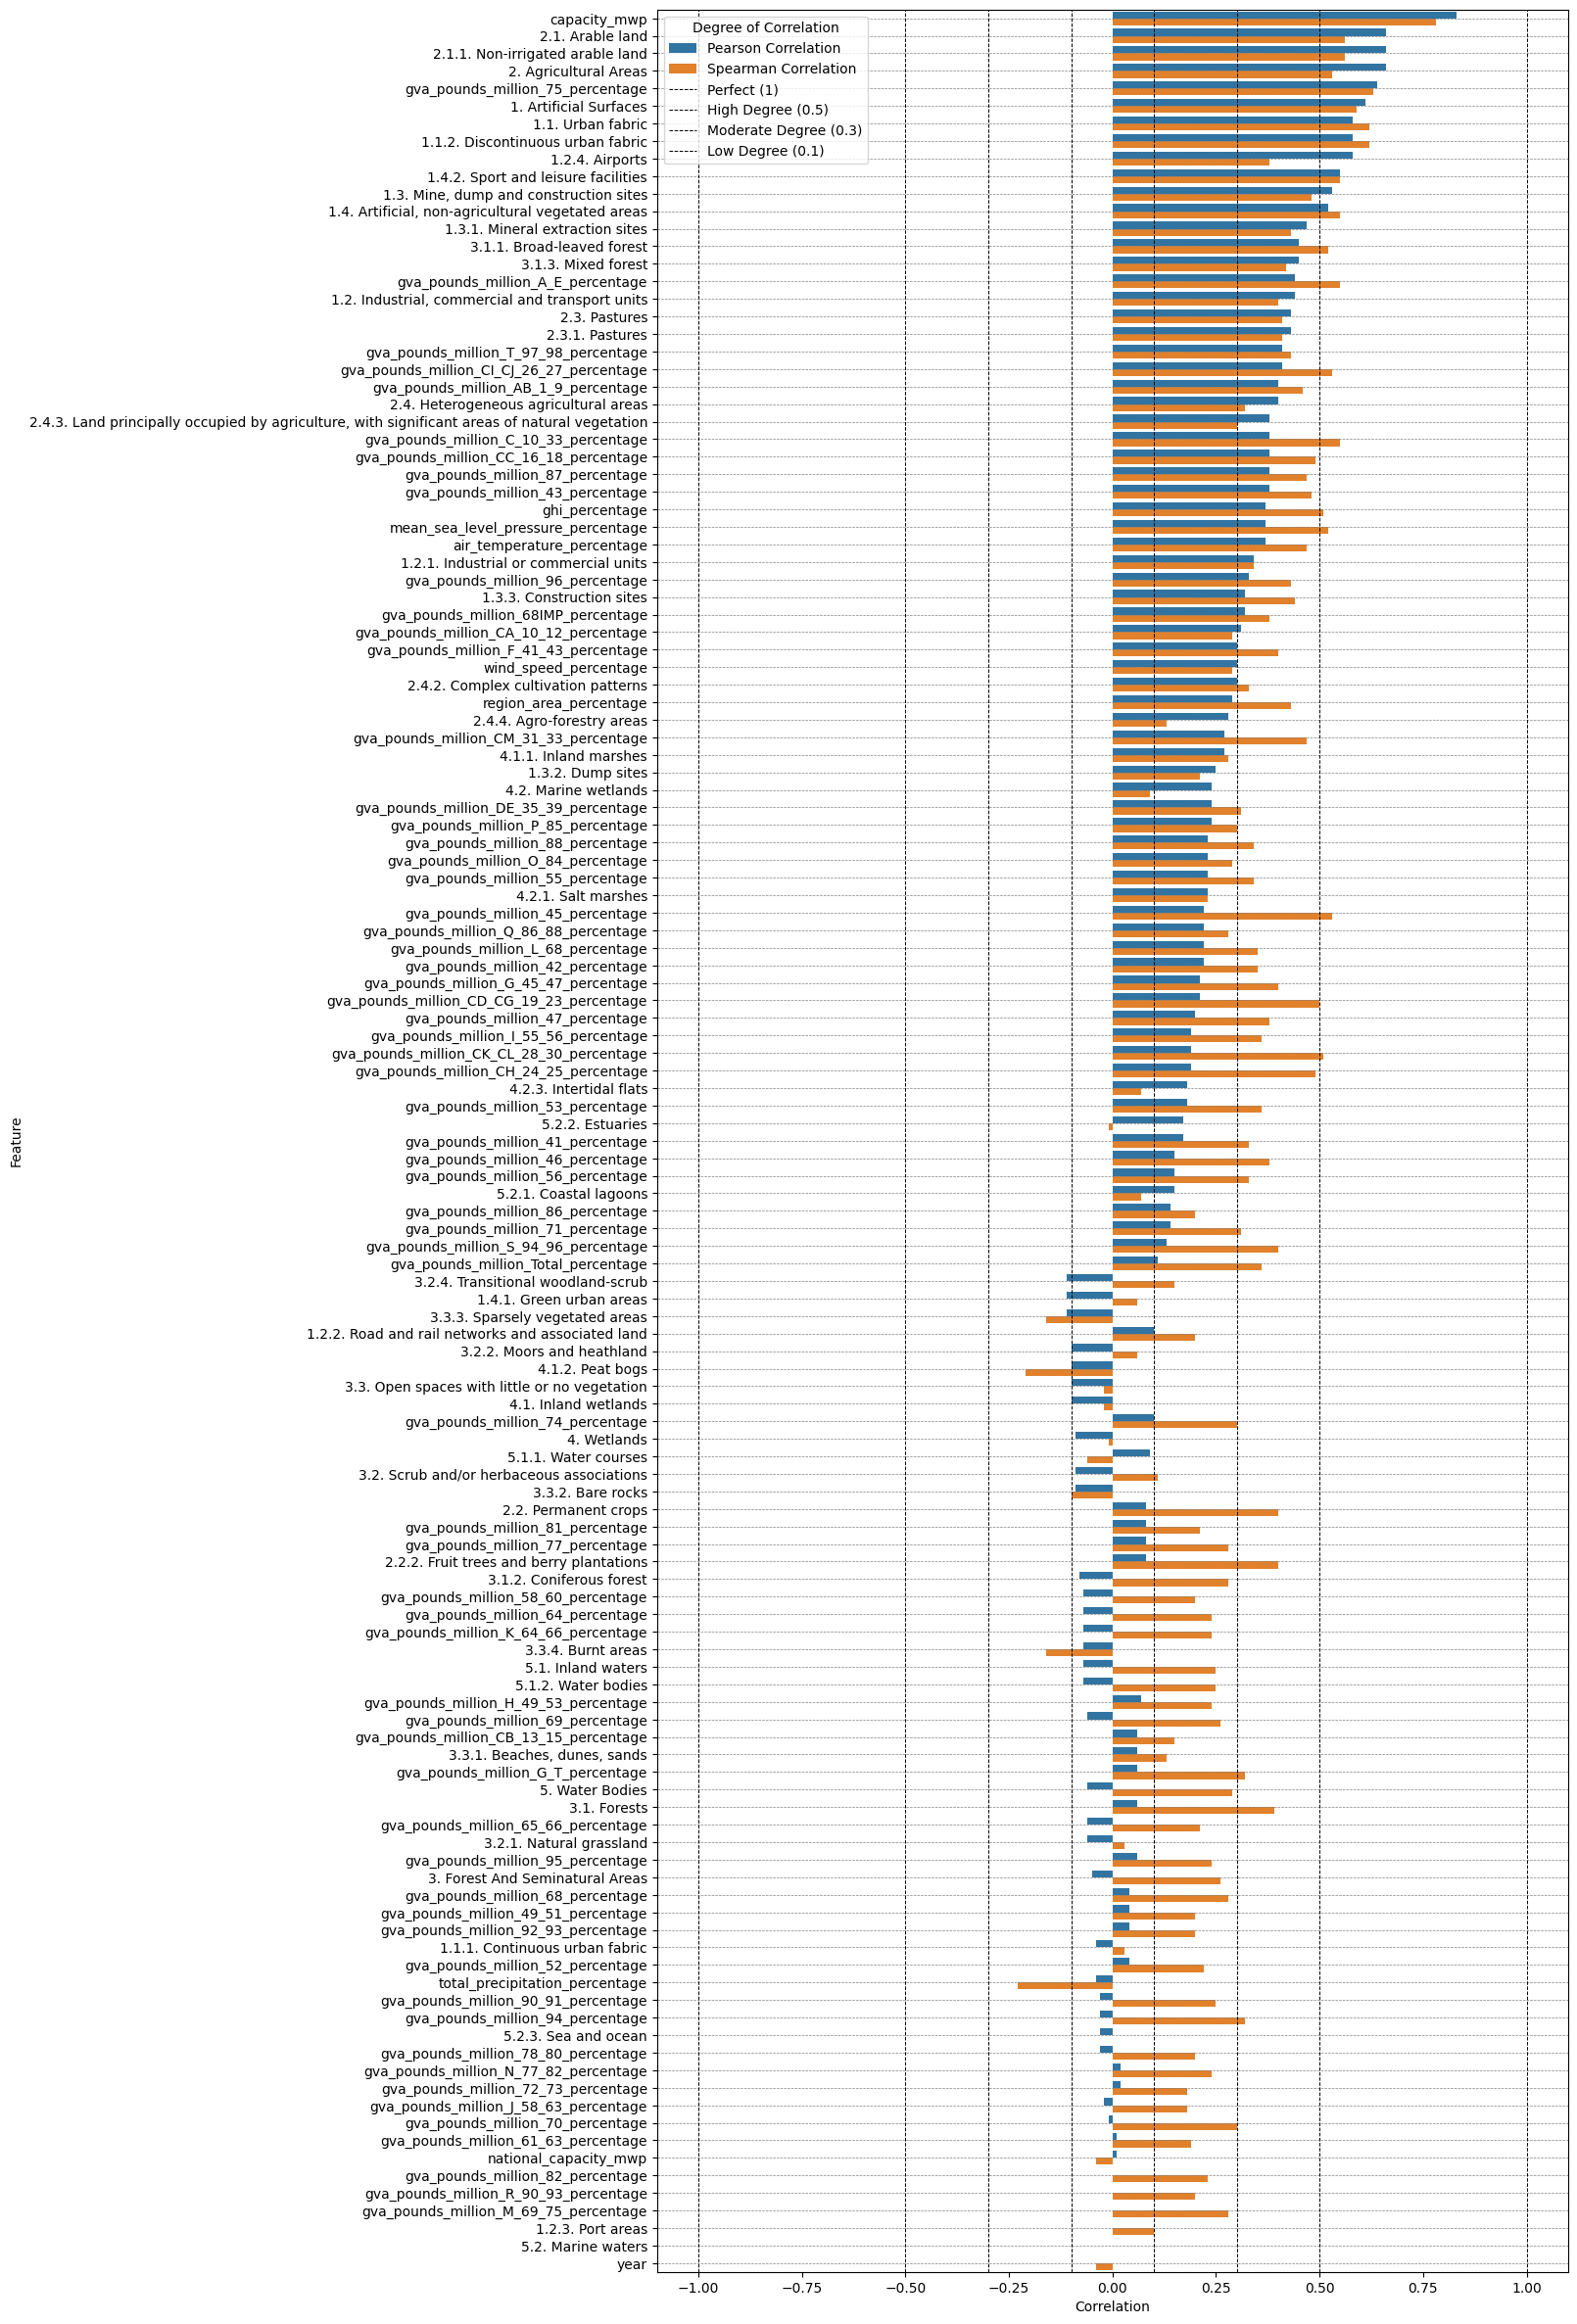

In [15]:
result_df = data_analysis(df, 'regional_capacity_percentage')
plot_correlations(result_df)


In [16]:

print_features_by_correlation(result_df)


Features sorted by absolute Pearson correlation:
capacity_mwp, 0.83
2.1. Arable land, 0.66
2.1.1. Non-irrigated arable land, 0.66
2. Agricultural Areas, 0.66
gva_pounds_million_75_percentage, 0.64
1. Artificial Surfaces, 0.61
1.1. Urban fabric, 0.58
1.1.2. Discontinuous urban fabric, 0.58
1.2.4. Airports, 0.58
1.4.2. Sport and leisure facilities, 0.55
1.3. Mine, dump and construction sites, 0.53
1.4. Artificial, non-agricultural vegetated areas, 0.52
1.3.1. Mineral extraction sites, 0.47
3.1.1. Broad-leaved forest, 0.45
3.1.3. Mixed forest, 0.45
gva_pounds_million_A_E_percentage, 0.44
1.2. Industrial, commercial and transport units, 0.44
2.3. Pastures, 0.43
2.3.1. Pastures, 0.43
gva_pounds_million_T_97_98_percentage, 0.41
gva_pounds_million_CI_CJ_26_27_percentage, 0.41
gva_pounds_million_AB_1_9_percentage, 0.4
2.4. Heterogeneous agricultural areas, 0.4
2.4.3. Land principally occupied by agriculture, with significant areas of natural vegetation, 0.38
gva_pounds_million_C_10_33_percenta

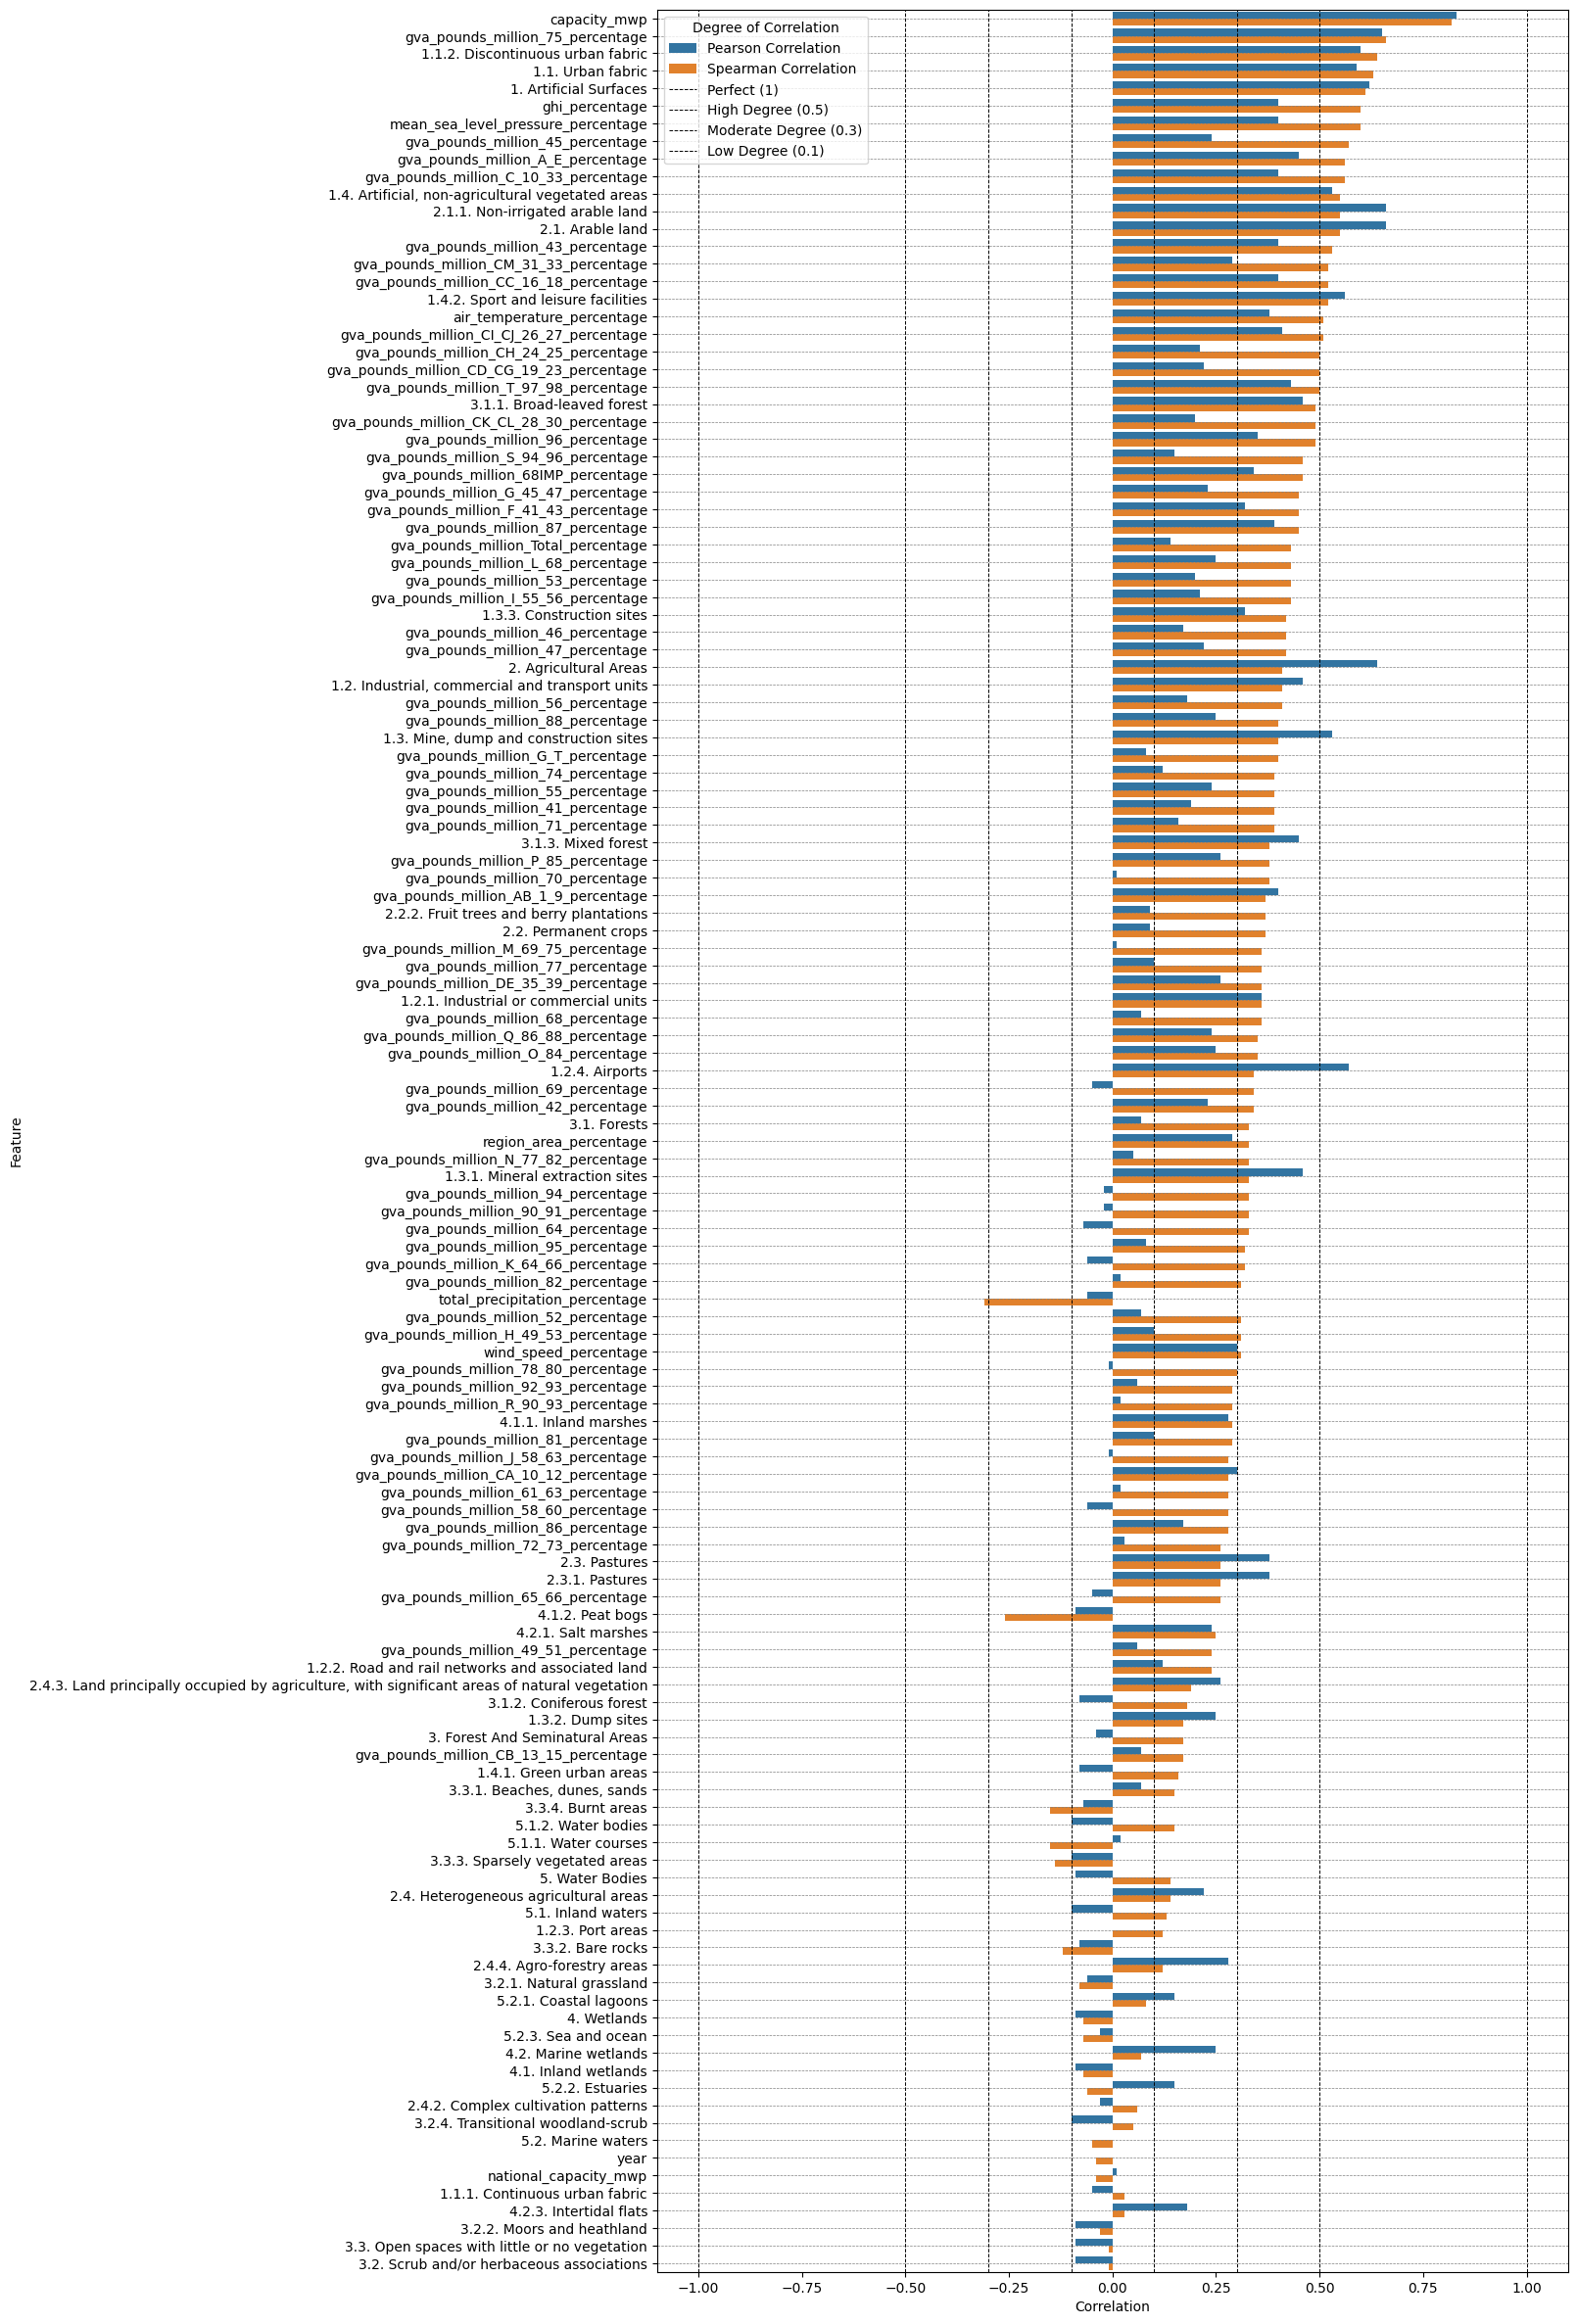

In [14]:
plot_correlations(result_df, 'Spearman')

### PCA

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['number'])

sc = StandardScaler()
df_std = sc.fit_transform(numeric_columns)

# Convert the standardized array back into a DataFrame
df_std = pd.DataFrame(df_std, columns=numeric_columns.columns)


In [16]:
df_std

,year,capacity_mwp,national_capacity_mwp,regional_capacity_percentage,1.1.1. Continuous urban fabric,1.1.2. Discontinuous urban fabric,1.2.1. Industrial or commercial units,1.2.2. Road and rail networks and associated land,1.2.3. Port areas,1.2.4. Airports,...,gva_pounds_million_87_percentage,gva_pounds_million_88_percentage,gva_pounds_million_R_90_93_percentage,gva_pounds_million_90_91_percentage,gva_pounds_million_92_93_percentage,gva_pounds_million_S_94_96_percentage,gva_pounds_million_94_percentage,gva_pounds_million_95_percentage,gva_pounds_million_96_percentage,gva_pounds_million_T_97_98_percentage
0,-1.612452,-0.515738,-1.646922,-0.633868,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,...,-0.788626,-0.275660,-0.532898,-0.356870,-0.626623,-0.710436,-0.323824,-0.449329,-0.928242,-0.921528
1,-1.364382,-0.515738,-1.482873,-0.633868,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,...,-0.689747,-0.296501,-0.532270,-0.359589,-0.613976,-0.707849,-0.331562,-0.466597,-0.919400,-1.012948
2,-1.116313,-0.515738,-1.341895,-0.633868,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,...,-0.665481,-0.153792,-0.532744,-0.360522,-0.611975,-0.712871,-0.340550,-0.459476,-0.924393,-0.926641
3,-0.868243,-0.515738,-1.142138,-0.633868,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,...,-0.647496,-0.161928,-0.539993,-0.363606,-0.612853,-0.716140,-0.341942,-0.465290,-0.910102,-1.021377
4,-0.620174,-0.515738,-0.698308,-0.633868,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,...,-0.583153,-0.112852,-0.550123,-0.371221,-0.639610,-0.702057,-0.342222,-0.523055,-0.874541,-0.953412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,0.620174,-0.515738,0.676936,-0.633868,-0.280513,-0.081426,0.634056,-0.355400,-0.491636,-0.252969,...,-0.018916,-0.590581,-0.389275,-0.191498,-0.535219,-0.334609,-0.295045,-0.413650,-0.194038,-0.599747
2502,0.868243,-0.515738,0.748201,-0.633868,-0.280513,-0.081426,0.634056,-0.355400,-0.491636,-0.252969,...,0.185973,-0.615652,-0.321286,-0.047370,-0.576313,-0.454861,-0.302680,-0.314742,-0.458521,-0.662047
2503,1.116313,-0.515738,0.846077,-0.633868,-0.280513,-0.081426,0.634056,-0.355400,-0.491636,-0.252969,...,0.002610,-0.559967,-0.403870,-0.114399,-0.663698,-0.538160,-0.273013,-0.421952,-0.641418,-0.710405
2504,1.364382,-0.515738,1.030681,-0.633868,-0.280513,-0.081426,0.634056,-0.355400,-0.491636,-0.252969,...,-0.024260,-0.489634,-0.400492,-0.144954,-0.630673,-0.546404,-0.304915,-0.438760,-0.634370,-0.766686


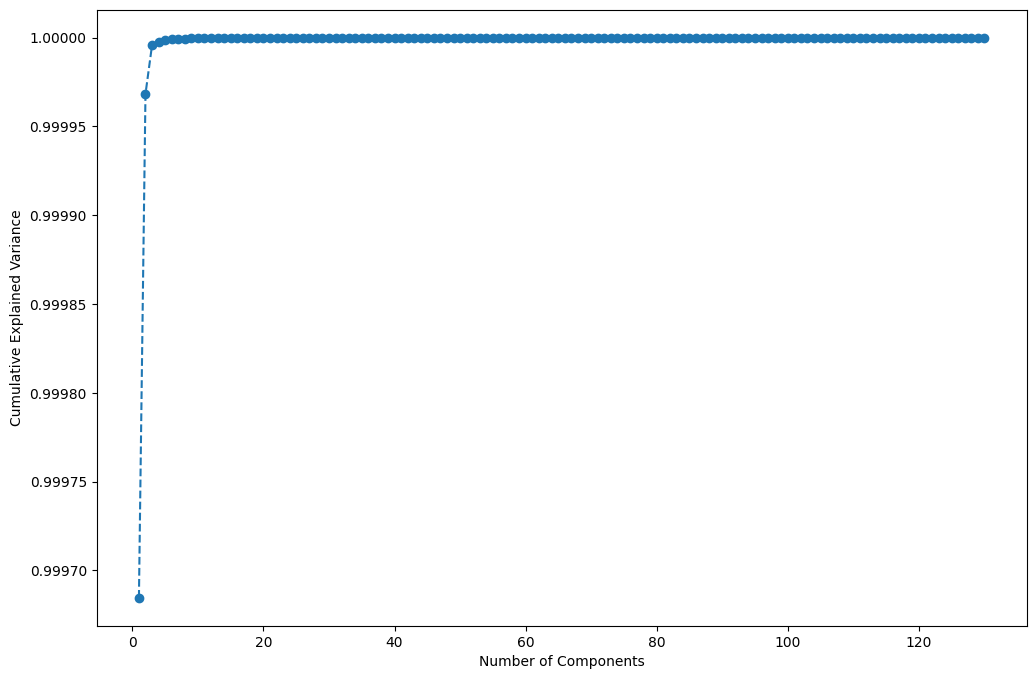

In [17]:
transformed_df, pca, columns_used, correlations, explained_variance_ratio, loadings= perform_pca(numeric_columns)

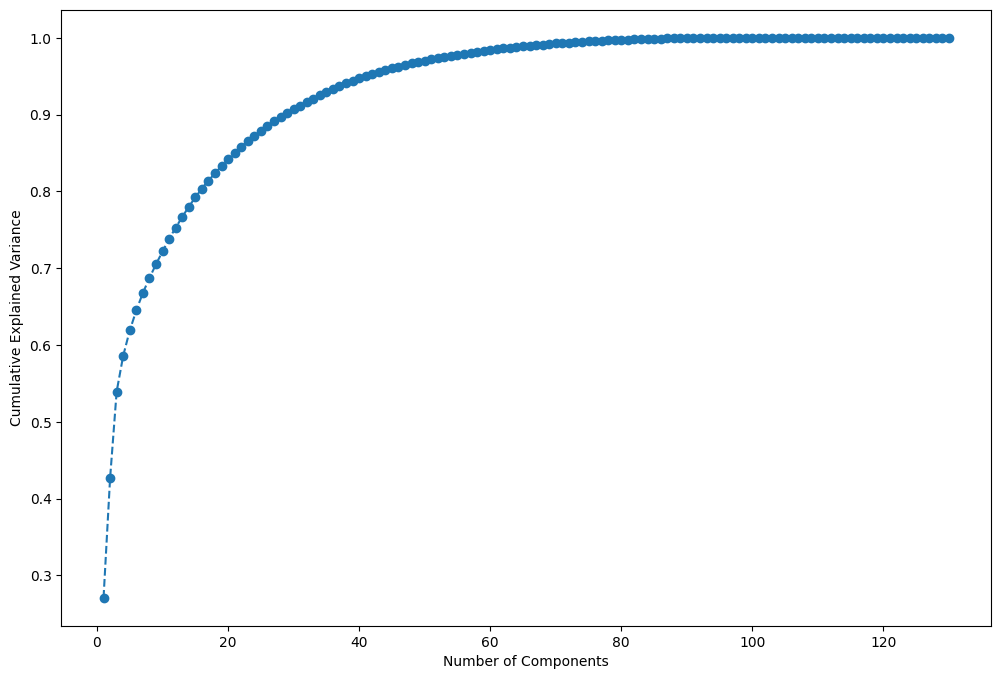

In [18]:
transformed_df1, pca1, columns_used1, correlations1, explained_variance_ratio1, loadings1= perform_pca(df_std)

In [19]:
transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130
0,-8597.763534,-2.742246,27.134088,-1.307946,-2.199846,1.941761,0.810510,0.810137,1.763137,-1.183520,...,4.787362e-13,-1.138086e-12,-8.607248e-13,-8.013507e-12,1.085063e-11,-1.390563e-12,5.136128e-12,-3.410248e-11,2.499396e-11,-1.741350e-11
1,-7683.933368,-11.407026,63.914978,3.468526,1.339172,1.140524,-0.092137,0.296430,1.580527,-0.849842,...,9.361384e-13,-1.633085e-12,-1.057044e-12,-1.105014e-11,1.424747e-11,-5.475682e-12,7.655828e-12,-4.673776e-11,4.014701e-11,-5.683632e-11
2,-6898.615790,-11.904485,17.812002,-2.725810,-3.244378,2.398106,0.957001,0.902621,1.851828,-1.217272,...,7.187112e-13,-1.608642e-12,-1.435176e-12,-1.194011e-11,1.521407e-11,-5.224475e-12,3.830347e-12,-7.080337e-11,4.888989e-11,-2.698819e-11
3,-5785.879175,-19.126975,26.078418,1.281882,-1.937825,3.556465,0.541864,0.723956,1.895913,-1.115522,...,1.005632e-12,-1.941507e-12,-1.796968e-12,-1.474611e-11,1.885578e-11,-8.599273e-12,3.358269e-12,-9.568605e-11,6.863911e-11,-4.912403e-11
4,-3313.540966,-34.087755,29.932079,-1.558767,-3.095268,4.958675,0.421837,0.769860,1.898534,-1.086591,...,9.807650e-13,-1.651791e-12,-1.776388e-12,-1.266736e-11,1.727174e-11,-7.577682e-12,-6.119182e-13,-8.521897e-11,6.287918e-11,-4.278063e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,3990.826239,-76.761882,24.939524,-12.292395,-2.711137,-4.375904,0.171370,0.437274,2.658170,-1.154882,...,5.614477e-12,-3.240735e-12,-5.382532e-12,-2.796288e-11,5.105568e-11,-5.443550e-11,-4.346199e-11,-2.747973e-10,2.707460e-10,-4.725161e-10
2102,4347.212020,-77.373297,7.858900,-16.399469,-5.222435,-3.321911,0.617397,0.704990,2.725183,-1.439660,...,5.776767e-12,-3.478363e-12,-6.064917e-12,-3.059876e-11,5.474135e-11,-5.725313e-11,-4.839654e-11,-3.102250e-10,2.932344e-10,-4.669008e-10
2103,4744.191600,-81.499398,27.580749,-15.255443,-3.359315,-5.170934,0.325125,0.550126,2.753873,-1.289232,...,6.530313e-12,-4.251522e-12,-6.658482e-12,-3.587843e-11,6.254779e-11,-6.450237e-11,-5.085772e-11,-3.427228e-10,3.256560e-10,-5.267765e-10
2104,5289.406511,-82.981176,9.025091,-15.363727,-3.595339,-7.378818,0.662142,0.568924,3.164498,-1.305834,...,5.838679e-12,-3.844906e-12,-6.280302e-12,-3.308979e-11,5.765336e-11,-5.856790e-11,-4.986197e-11,-3.259091e-10,3.033695e-10,-4.716909e-10


In [20]:
pca

PCA()

In [21]:
# columns_used

In [22]:
# correlations

In [23]:
explained_variance_ratio1

array([2.70970078e-01, 1.55902935e-01, 1.12554440e-01, 4.66347232e-02,
       3.28143949e-02, 2.62137537e-02, 2.27097456e-02, 1.93356738e-02,
       1.78994584e-02, 1.67741166e-02, 1.62715522e-02, 1.45371981e-02,
       1.39277073e-02, 1.33477248e-02, 1.22437422e-02, 1.14733302e-02,
       1.04003417e-02, 9.53944403e-03, 9.43453231e-03, 8.99866195e-03,
       8.32555749e-03, 7.78688844e-03, 7.20355044e-03, 6.95341763e-03,
       6.65867119e-03, 6.30673646e-03, 5.80767523e-03, 5.44020387e-03,
       5.30054599e-03, 5.22957211e-03, 4.69819263e-03, 4.68893914e-03,
       4.44976074e-03, 4.27685497e-03, 4.02757844e-03, 3.96371654e-03,
       3.71095581e-03, 3.69692825e-03, 3.33457216e-03, 3.09563563e-03,
       2.83538263e-03, 2.75786500e-03, 2.70785705e-03, 2.47421595e-03,
       2.43450791e-03, 2.28643187e-03, 2.20762373e-03, 2.03469275e-03,
       1.84968537e-03, 1.76243942e-03, 1.72154188e-03, 1.61176949e-03,
       1.53499128e-03, 1.43381121e-03, 1.38677813e-03, 1.31620329e-03,
      

In [24]:
explained_variance_ratio

array([9.99684535e-01, 2.83785900e-04, 2.74578579e-05, 1.63055457e-06,
       1.14962949e-06, 6.49475839e-07, 2.04360216e-07, 1.14999371e-07,
       6.38397782e-08, 4.51512753e-08, 4.38347389e-08, 2.75466740e-08,
       2.48852024e-08, 2.30586379e-08, 2.07701857e-08, 2.00342417e-08,
       1.79323504e-08, 1.58358812e-08, 1.48295938e-08, 1.19841849e-08,
       1.13579429e-08, 1.05555580e-08, 9.90705157e-09, 9.28843461e-09,
       8.53657187e-09, 7.55314969e-09, 6.74073891e-09, 6.16547675e-09,
       5.43823178e-09, 5.24759878e-09, 4.83525973e-09, 4.65239996e-09,
       4.01724726e-09, 3.88170359e-09, 3.69346258e-09, 3.50891337e-09,
       3.11647086e-09, 2.93627370e-09, 2.85287709e-09, 2.79235870e-09,
       2.49053821e-09, 2.30745925e-09, 2.10090139e-09, 1.99157290e-09,
       1.81566112e-09, 1.66300490e-09, 1.50646678e-09, 1.39156088e-09,
       1.34523606e-09, 1.19596401e-09, 1.14849794e-09, 1.10155784e-09,
       9.45314134e-10, 7.87103509e-10, 6.70450619e-10, 6.22900263e-10,
      

In [25]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130
year,6.655042e-04,-4.462283e-05,-0.000041,0.000047,0.000474,0.000172,-0.002379,-0.003744,0.004017,-0.005211,...,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
capacity_mwp,5.853770e-03,9.953893e-01,0.092340,-0.020307,-0.003902,0.002462,0.007095,0.004045,-0.008180,-0.002165,...,6.823606e-16,-6.000237e-16,-7.379355e-17,-3.752736e-15,7.734560e-15,-5.025490e-15,6.788791e-15,-6.966328e-15,1.058665e-14,-2.173092e-14
national_capacity_mwp,9.999826e-01,-5.826891e-03,-0.000540,0.000120,0.000021,-0.000015,-0.000039,-0.000019,0.000046,0.000017,...,-2.615899e-18,4.841799e-18,1.510768e-18,3.394434e-17,-7.164595e-17,1.329963e-17,-2.646149e-17,1.168291e-16,-5.908803e-17,-5.195461e-17
regional_capacity_percentage,2.011969e-06,8.430622e-03,-0.001874,0.008557,0.002678,0.001543,-0.029399,-0.030038,0.080550,0.036846,...,-4.913902e-13,-3.229051e-14,6.442543e-13,1.134192e-12,-2.454746e-12,5.430735e-12,7.314828e-12,3.279516e-11,-2.915964e-11,2.061942e-11
1.1.1. Continuous urban fabric,-8.107307e-13,-4.655887e-07,-0.000003,-0.000035,0.000062,0.000030,-0.000115,0.000101,-0.000059,0.000134,...,6.861155e-04,1.792243e-03,-6.815212e-04,1.325939e-02,-1.246374e-02,7.815355e-03,-1.661293e-02,1.124318e-01,-2.162647e-02,-9.121875e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gva_pounds_million_S_94_96_percentage,1.127091e-06,1.048815e-03,-0.005931,-0.030156,0.082769,0.022183,-0.094042,-0.001665,-0.007579,0.030271,...,1.863752e-12,6.369215e-13,-1.264603e-12,4.377224e-12,8.887617e-12,-1.002020e-11,-1.752834e-11,2.460086e-11,1.094534e-11,-1.856701e-11
gva_pounds_million_94_percentage,1.246576e-06,-3.073199e-04,-0.009801,-0.071856,0.218900,0.075546,-0.058450,0.243686,-0.016141,0.097483,...,-2.987255e-13,-4.753073e-13,2.504941e-15,-3.624878e-12,1.087968e-12,5.467224e-13,5.035444e-12,-2.558505e-11,1.025782e-11,-4.045406e-12
gva_pounds_million_95_percentage,1.900227e-06,7.555875e-04,-0.007252,-0.023925,0.034853,-0.005469,-0.208064,-0.251906,-0.146604,-0.296923,...,-5.632127e-14,-2.084166e-13,-2.757516e-13,-1.945277e-12,1.593101e-12,-7.215062e-13,-1.878275e-12,-2.137729e-11,1.252351e-11,-2.292527e-12
gva_pounds_million_96_percentage,9.497226e-07,1.639157e-03,-0.004168,-0.013502,0.032388,0.003666,-0.092369,-0.074250,0.015454,0.044295,...,-1.965604e-12,4.781610e-13,2.012386e-12,4.539594e-12,-1.800173e-11,1.430479e-11,2.026350e-11,5.121586e-11,-5.680610e-11,2.585154e-11


### Variable Clustering

In [26]:
info_df, rsquare_df = variable_clustering(df, maxeigval2=1, maxclus=5)


In [27]:
info_df

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,41,26.860902,3.861929,0.655144
1,1,29,17.126820,3.131448,0.590580
2,2,31,15.230362,1.907739,0.491302
3,3,15,6.380817,1.957293,0.425388
4,4,14,5.374940,2.090162,0.383924


In [28]:
rsquare_df

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,1.1.1. Continuous urban fabric,0.320712,0.046284,0.712254
1,0,gva_pounds_million_Total_percentage,0.956149,0.316304,0.064138
2,0,gva_pounds_million_41_percentage,0.727493,0.444961,0.490968
3,0,gva_pounds_million_G_T_percentage,0.950631,0.221166,0.063389
4,0,gva_pounds_million_G_45_47_percentage,0.663165,0.585486,0.812601
...,...,...,...,...,...
125,4,4.1.1. Inland marshes,0.203379,0.014228,0.808118
126,4,2.1. Arable land,0.728821,0.331463,0.405631
127,4,"1.2. Industrial, commercial and transport units",0.606295,0.335069,0.592099
128,4,1.2.1. Industrial or commercial units,0.462521,0.298125,0.765775


In [29]:
# Merge the two DataFrames on the 'Feature' and 'Variable' columns
merged_df = pd.merge(result_df, rsquare_df, left_on='Feature', right_on='Variable', how='left')

# Drop the duplicate 'Variable' column
merged_df.drop('Variable', axis=1, inplace=True)

# Print the resulting DataFrame
merged_df

,Feature,R-squared,Pearson Correlation,Pearson P-value,Spearman Correlation,Spearman P-value,Data Availability (%),Correlation Average,Cluster,RS_Own,RS_NC,RS_Ratio
0,year,0.00,0.00,0.8547,-0.04,0.0584,100.000000,-0.020,4,0.004551,0.000018,0.995467
1,capacity_mwp,0.69,0.83,0.0000,0.82,0.0000,100.000000,0.825,4,0.497784,0.181830,0.613828
2,national_capacity_mwp,0.00,0.01,0.8009,-0.04,0.0584,100.000000,-0.015,4,0.004888,0.000012,0.995125
3,1.1.1. Continuous urban fabric,0.00,-0.05,0.0163,0.03,0.1560,100.000000,-0.010,0,0.320712,0.046284,0.712254
4,1.1.2. Discontinuous urban fabric,0.35,0.60,0.0000,0.64,0.0000,100.000000,0.620,2,0.866937,0.422567,0.230439
...,...,...,...,...,...,...,...,...,...,...,...,...
124,gva_pounds_million_S_94_96_percentage,0.02,0.15,0.0000,0.46,0.0000,92.857143,0.305,0,0.889889,0.304724,0.158370
125,gva_pounds_million_94_percentage,0.00,-0.02,0.2456,0.33,0.0000,92.857143,0.155,0,0.689812,0.022481,0.317322
126,gva_pounds_million_95_percentage,0.01,0.08,0.0002,0.32,0.0000,92.857143,0.200,2,0.304766,0.164193,0.831811
127,gva_pounds_million_96_percentage,0.13,0.35,0.0000,0.49,0.0000,92.857143,0.420,2,0.715540,0.520591,0.593356
